<a href="https://colab.research.google.com/github/jobayed80/Machine_Learning_Learning_Course/blob/main/Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Md. Jobayed Hossain Rabbi
# 193-35-2948



##import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [11]:
df = pd.DataFrame()

In [12]:
df = pd.read_csv("homeprices.csv")

In [13]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [14]:
#First three rows shows
df.head(3)

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000


In [15]:
#row and column check
df.shape

(6, 4)

In [16]:
#null value check
df.isnull().sum()

#sum() function that means per column sum of null value

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [17]:
#Replace Missing Values with Mean
df.fillna(df.mean())

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 320.0 bytes


In [19]:
# x level 2 dimentional
# y level 1 dimentional
x = df[['area']]
y= df['price']

### **Visualization**

<ipython-input-20-3935a25e8f91>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, color='red', cmap='jet' , marker='d')
<ipython-input-20-3935a25e8f91>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


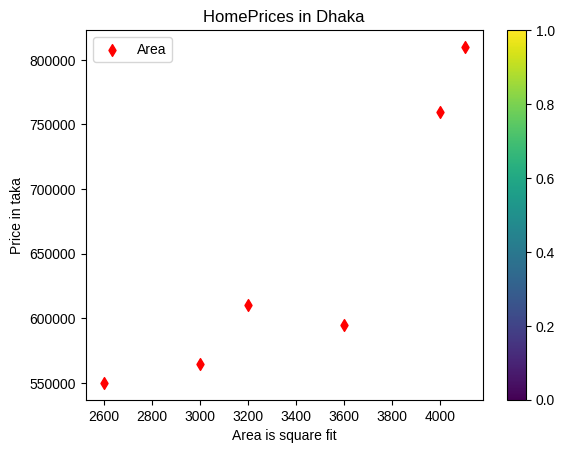

<Figure size 700x550 with 0 Axes>

<Figure size 800x400 with 0 Axes>

In [20]:
plt.scatter(x, y, color='red', cmap='jet' , marker='d')
plt.colorbar()
plt.title("HomePrices in Dhaka")
plt.legend(["Area", "Price"])
plt.xlabel("Area is square fit")
plt.ylabel("Price in taka")
alpha=0.5
plt.style.use("seaborn")
plt.figure().set_figwidth(7)
plt.figure().set_figheight(4)
plt.show()

In [21]:
x

,area
0,2600
1,3000
2,3200
3,3600
4,4000
5,4100


In [22]:
y

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

### **Train Test Spilt**

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
xtrain , xtest , ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)
#ekhane 70% holo train korbe
#ekhane 30% holo test korbe..
#random state holo,,,ekhane amr j data gulu ache segulur randomly data gulu select krbe


In [25]:
#show the randomly xtrain data
xtrain

,area
4,4000
0,2600
3,3600
5,4100


In [26]:
# show the ytrain data
ytrain

4    760000
0    550000
3    595000
5    810000
Name: price, dtype: int64

In [27]:
#show the xtest data
xtest

,area
2,3200
1,3000


In [28]:
#show the ytest data
ytest

2    610000
1    565000
Name: price, dtype: int64

### Ridge Regression Model

In [29]:
# Create a Ridge Regression model
alpha = 1.0
ridge_reg = Ridge(alpha=alpha, solver="cholesky")

In [30]:
# Train the model
ridge_reg.fit(xtrain, ytrain)

Ridge(solver='cholesky')

In [31]:
# Make predictions on the test set
y_pred = ridge_reg.predict(xtest)

In [32]:
# Evaluate the model
mse = mean_squared_error(ytest, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 256359975.98925745


<ipython-input-33-a3f49974d6ee>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, color='red', cmap='jet' , marker='d')
<ipython-input-33-a3f49974d6ee>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


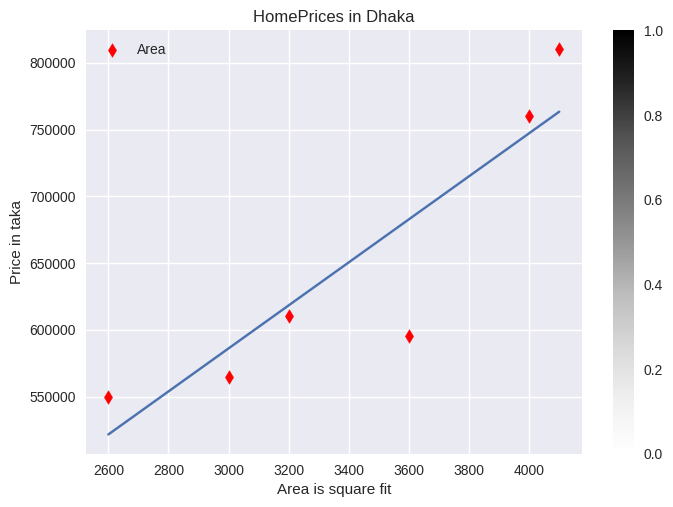

In [33]:
#best split line
plt.scatter(x, y, color='red', cmap='jet' , marker='d')
plt.colorbar()
plt.title("HomePrices in Dhaka")
plt.legend(["Area", "Price"])
plt.xlabel("Area is square fit")
plt.ylabel("Price in taka")
alpha=0.5
plt.style.use("seaborn")
plt.plot(df.area , ridge_reg.predict(df[['area']]))

In [34]:
#new value prediction
# area = 4200
ridge_reg.predict([[4200]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([779493.71172738])

In [35]:
# How to work prediction value when using new value add
# y = mx+c
ridge_reg.coef_

array([161.18993876])

In [36]:
ridge_reg.intercept_
y = 125.96153846 * 4200 + 223397.43589743582
y

752435.8974294357

### Lasso Regression **Model**

In [37]:
# Create a Lasso Regression model
alpha = 0.5  # Regularization strength (you can adjust this parameter)
lasso_reg = Lasso(alpha=alpha)

In [38]:
# Train the model
lasso_reg.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = lasso_reg.predict(xtest)

In [39]:
# Evaluate the model
mse = mean_squared_error(ytest, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 256358253.82955572


# **ElasticNet Regression Model**

In [40]:
# Create an Elastic Net Regression model
alpha = 0.1  # Regularization strength (you can adjust this parameter)
l1_ratio = 0.5  # Mix ratio between L1 and L2 regularization (you can adjust this parameter)
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)


In [41]:
# Train the model
elastic_net.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = elastic_net.predict(xtest)


In [42]:
# Evaluate the model
mse = mean_squared_error(ytest, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 256358583.11564928


we use synthetic data for illustration. Replace X and y with own dataset. The alpha parameter controls the overall strength of the regularization, and the l1_ratio parameter controls the mix between L1 and L2 regularization.